<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Cory, I am a reviewer on this project. Congratulations on submitting the second integrated project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

   
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
        
    
- Read the data;

    


- Handled missing values;    
    
    
    
- Displayed concentration boxplots for three metals and analyzed them;    
    
        
    
- You have successfully compared the distributions in the test and training sets;

    
- Correctly defined the smape function; 


- Excluded columns that not available in the test set from the training subset.    
    
    
- Trained several models; 



- Analyzed metrics. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;

   
    
    
- Wrote conclusions! 

</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance: 
    
    
- Would you please add an introduction and a title to the project? 

    
      
    
- Please pay attention to the columns not available in the test set. Why is that so? What do they indicate? Do we need to use them during the training process? 
    
    
- We need to drop missing values from the target columns before we fill in the gaps.


- Please fill in the gaps using `median` or `ffill` method.    
    
    
- Please fix the issues I described in the concentration analysis sections. 
    
       
      
    
- Please try to tune hyperparameters for at least one of the models. 
    
    
    
- Please don't forget about the final conclusion;

    
    
- Make sure each cell in the project works fine before you send it for review. 

    
There may be some other issues, I explained everything in my comments.    
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much! The updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
 

    
<hr>
    
✍️ Here's a nice article: [Developing Multi-Target Regression Models with Python](https://medium.com/@tubelwj/developing-multi-class-regression-models-with-python-c8beca5dd482) that you may find interesting.    
<hr>
    
📌 Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
First things first. The introduction is the initial paragraph that each project, each essay or any article should have. It is important to write an introductory part because it gives an idea about the content of the project. Please, add a title with some introduction :) 
    
</div>

Today we are looking at the concentrations of three metals as it goes through the process of refining. We will be looking for a few different things such as the MAE, and later in the analysis we will be looking at the sMAPE which is a metric sed to evaluate the accuracy of predictive models that will be used today.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

In [2]:
df_train = pd.read_csv("/datasets/gold_recovery_train.csv", index_col="date", parse_dates=True)
df_test = pd.read_csv("/datasets/gold_recovery_test.csv", index_col="date", parse_dates=True)
df_full = pd.read_csv("/datasets/gold_recovery_full.csv", index_col="date", parse_dates=True)

display("Train Data Sample:\n", df_train.head())
display("Test Data Sample:\n", df_test.head())
display("Full Data Sample:\n", df_full.head())

'Train Data Sample:\n'

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


'Test Data Sample:\n'

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


'Full Data Sample:\n'

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


All of the data has been pulled, Lets check to see if there are any missing values. We can tell that there are some columns that are in our df_train that aren't in our df_test...we will handle those missing values in a bit!

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
The data was successfully read, well done! 

</div>

In [3]:
missing_values = df_full.isnull()
display(missing_values)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-15 01:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-15 02:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-15 03:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-15 04:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-08-18 07:59:59,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-08-18 08:59:59,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

Try to use `display` instead of `print` with dataframes :) The output will look better.



</div>

In [4]:
columns_to_drop = [
    "final.output.concentrate_ag",
    "final.output.concentrate_pb",
    "final.output.concentrate_sol",
    "final.output.concentrate_au",
    "final.output.recovery",
    "final.output.tail_ag",
    "final.output.tail_pb",
    "final.output.tail_sol",
    "final.output.tail_au"
]

df_train = df_train.dropna(subset=columns_to_drop)

display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14934 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14934 non-null  float64
 1   final.output.concentrate_pb                         14934 non-null  float64
 2   final.output.concentrate_sol                        14934 non-null  float64
 3   final.output.concentrate_au                         14934 non-null  float64
 4   final.output.recovery                               14934 non-null  float64
 5   final.output.tail_ag                                14934 non-null  float64
 6   final.output.tail_pb                                14934 non-null  float64
 7   final.output.tail_sol                               14934 non-null  float64
 8   final.output.tail_au                     

None

In [5]:
df_train = df_train.fillna(df_train.median())
df_test = df_test.fillna(df_test.median())

display(df_train.info())
display(df_test.info())
display(df_train.isna().sum(), df_test.isna().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14934 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14934 non-null  float64
 1   final.output.concentrate_pb                         14934 non-null  float64
 2   final.output.concentrate_sol                        14934 non-null  float64
 3   final.output.concentrate_au                         14934 non-null  float64
 4   final.output.recovery                               14934 non-null  float64
 5   final.output.tail_ag                                14934 non-null  float64
 6   final.output.tail_pb                                14934 non-null  float64
 7   final.output.tail_sol                               14934 non-null  float64
 8   final.output.tail_au                     

None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5856 non-null   float64
 1   primary_cleaner.input.depressant            5856 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5856 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5856 

None

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

Perfect! We have removed the missing values but have retained the data we need to perform our testing! Now, Let's calculate the MAE for our Recovery Calculation!

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
- Don't forget to drop missing values in target columns before you fill in the gaps. 
    



- Let's also use medians, since it does not skew the distribution.

</div>

In [6]:
def calculate_recovery(c, f, t):
    return (c * (f - t)) / (f * (c - t)) * 100

df_recovery = df_train[["rougher.output.recovery", 
                         "rougher.output.concentrate_au", 
                         "rougher.input.feed_au", 
                         "rougher.output.tail_au"]].dropna()

true_recovery = df_recovery["rougher.output.recovery"]
calculated_recovery = calculate_recovery(df_recovery["rougher.output.concentrate_au"], 
                                         df_recovery["rougher.input.feed_au"], 
                                         df_recovery["rougher.output.tail_au"])

calculated_recovery.replace([np.inf, -np.inf], np.nan, inplace=True)
calculated_recovery = calculated_recovery.dropna()

true_recovery = true_recovery.loc[calculated_recovery.index]

mae = mean_absolute_error(true_recovery, calculated_recovery)
print(f"Mean Absolute Error for Recovery Calculation: {mae}")

Mean Absolute Error for Recovery Calculation: 11.153601011360065


An MAE of 11.15! Not bad, This means that from a scale of 0 - 100 our predictive accuracy is pretty great! In laymans terms it means that with the recovery we will be either plus or minus 11.15 units!

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
The formula is correct.     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
- However, the error value is too large. Please try to first check validate the data using this formula, and only them fill in the gaps. 


- Would you please add a conclusion? What does low or high MAE mean here? 

</div>

Quite a bit here missing from the test set. No big deal, with enough digging and work we will make sure that the final product is exactly what we need.

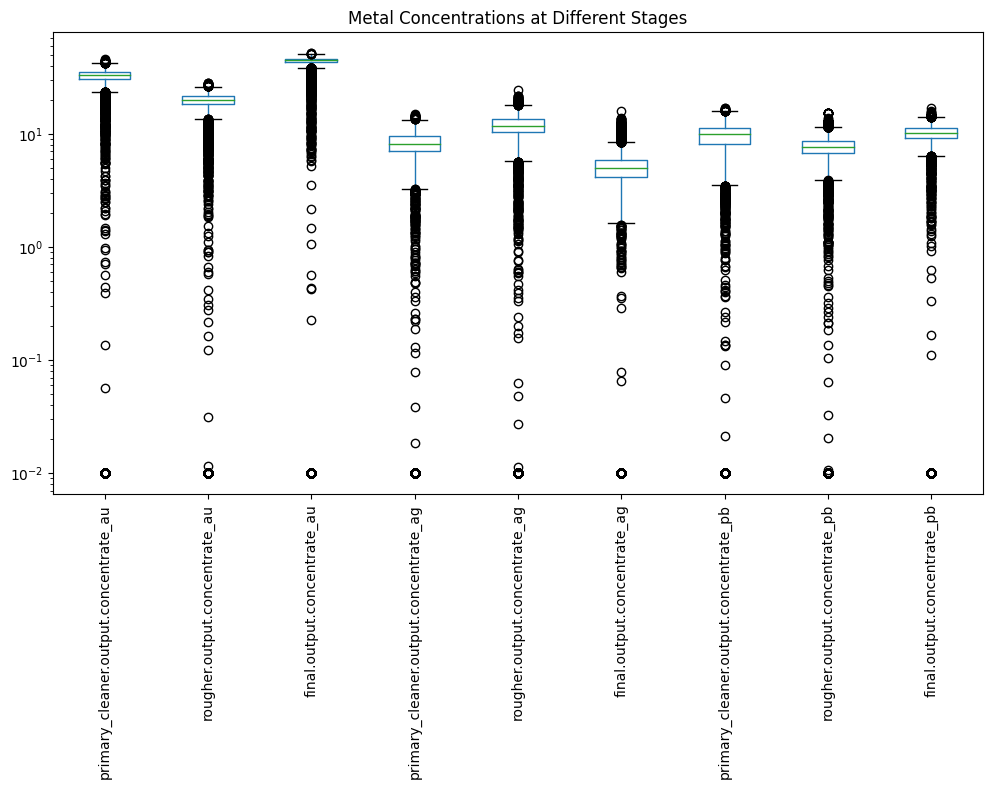

In [7]:
metal_columns = ["primary_cleaner.output.concentrate_au", "rougher.output.concentrate_au", "final.output.concentrate_au",
                 "primary_cleaner.output.concentrate_ag", "rougher.output.concentrate_ag", "final.output.concentrate_ag",
                 "primary_cleaner.output.concentrate_pb", "rougher.output.concentrate_pb", "final.output.concentrate_pb"]

df_train[metal_columns].plot(kind='box', figsize=(12,6), logy=True)
plt.title("Metal Concentrations at Different Stages")
plt.xticks(rotation=90)
plt.show()



Interestingly enough, both AU and PB both improve in their quality has they are refined in each step. That being said AG improves in the first filtering step and then is worse then when it starts in the second filtering step. 

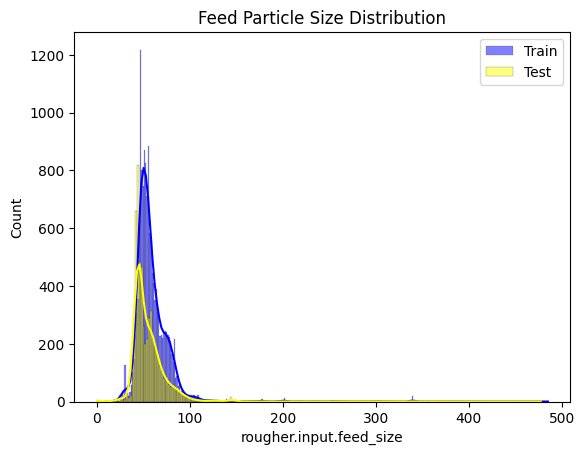

In [8]:
sns.histplot(df_train["rougher.input.feed_size"], kde=True, label="Train", color='blue')
sns.histplot(df_test["rougher.input.feed_size"], kde=True, label="Test", color='yellow')
plt.legend()
plt.title("Feed Particle Size Distribution")
plt.show()

For this graph we wanted to see if our test and train models were similar or different, as shown above they are similar which is great because it shows we are on the right path! If the didn't look the same and had different shapes our earlier coding and process would have been flawed and unusable!

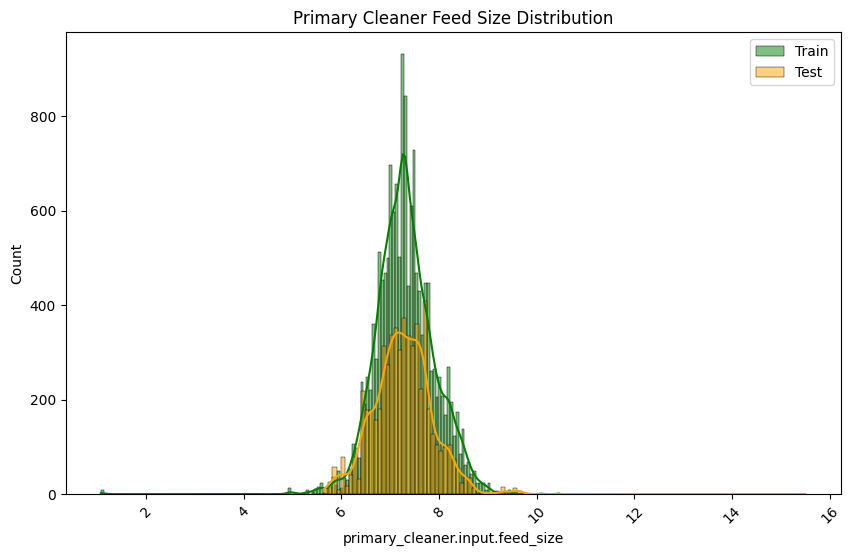

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df_train["primary_cleaner.input.feed_size"], kde=True, label="Train", color='green')
sns.histplot(df_test["primary_cleaner.input.feed_size"], kde=True, label="Test", color='orange')
plt.legend()
plt.title("Primary Cleaner Feed Size Distribution")
plt.xticks(rotation=45)
plt.show()

What we are seeing here is the first step in the cleaning or purifying process! Before the first round of purification we see that between all three metals the bell curve between our test and train system all metals are very close in the fact that most of the metal is generally the same. There is some that is more purified and some that are less, however there are none that are crazy outliers causing issues with the process

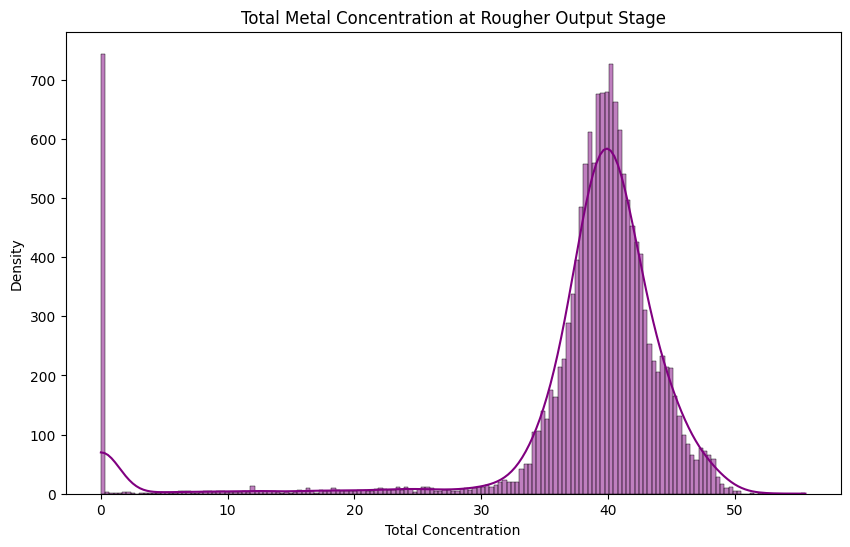

In [10]:
df_train["rougher.input.feed_total"] = df_train[["rougher.input.feed_au", "rougher.input.feed_ag", "rougher.input.feed_pb"]].sum(axis=1)
df_train["rougher.output.concentrate_total"] = df_train[["rougher.output.concentrate_au", "rougher.output.concentrate_ag", "rougher.output.concentrate_pb"]].sum(axis=1)
df_train["final.output.concentrate_total"] = df_train[["final.output.concentrate_au", "final.output.concentrate_ag", "final.output.concentrate_pb"]].sum(axis=1)

plt.figure(figsize=(10,6))
sns.histplot(df_train["rougher.output.concentrate_total"].dropna(), kde=True, color='purple')
plt.title("Total Metal Concentration at Rougher Output Stage")
plt.xlabel("Total Concentration")
plt.ylabel("Density")
plt.show()

Here we have our first step in the purification process! There are some outliers but they wont effect the data for us. When we take the sum of all the metals and put them in our graph we see that the density is higher then I wouldve expected, this is why we trust the data! We can see that we overall are getting a better outcome from our metal instead of just looking at one of the metals which will mean better profits when selling all three! 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
- Let's analyze histograms as well.  For this purpose, please use  `primary_cleaner.output.concentrate_`, `rougher.output.concentrate_`, and `final.output.concentrate_` columns for each of the three metals. We need to see how concentration changes from stage to stage for each metal.



- For the particle size comparison, please display one more chart with the `primary_cleaner.input.feed_size` distributions.



- For the total concentration analysis, please use `rougher.input.feed_`, `rougher.output.concentrate_`, and `final.output.concentrate_` columns and sum them for each of the three metals. For instance, for the `rougher.output.concentrate_`, we sum `rougher.output.concentrate_au`, `rougher.output.concentrate_ag`, and `rougher.output.concentrate_pb` and display histogram. Would you fix it please? 
    


- Under each result, would you please add a conclusion? 


- Are there any outliers? If yes, do we need to drop them? </div>

In [12]:
features = list(df_test.columns)
targets = ["rougher.output.recovery", "final.output.recovery"]

combined_df = df_train.dropna(subset=targets + features)
X_train = combined_df[features]
y_train = combined_df[targets]

def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape_values = numerator / denominator
    return np.mean(smape_values) * 100

smape_scorer = make_scorer(smape, greater_is_better=False)

model_rougher = RandomForestRegressor(n_estimators=100, random_state=12345)
model_final = RandomForestRegressor(n_estimators=100, random_state=12345)

model_rougher.fit(X_train, y_train["rougher.output.recovery"])
model_final.fit(X_train, y_train["final.output.recovery"])

y_pred_rougher = model_rougher.predict(X_train)
y_pred_final = model_final.predict(X_train)

smape_rougher = smape(y_train["rougher.output.recovery"], y_pred_rougher)
smape_final = smape(y_train["final.output.recovery"], y_pred_final)

scores_rougher = -cross_val_score(model_rougher, X_train, y_train["rougher.output.recovery"], cv=5, scoring=smape_scorer)
scores_final = -cross_val_score(model_final, X_train, y_train["final.output.recovery"], cv=5, scoring=smape_scorer)

final_sMAPE = 0.25 * smape_rougher + 0.75 * smape_final

print(f"sMAPE Rougher Scores: {scores_rougher}")
print(f"sMAPE Final Scores: {scores_final}")
print(f"Mean sMAPE Rougher: {np.mean(scores_rougher)}")
print(f"Mean sMAPE Final: {np.mean(scores_final)}")
print(f"Final sMAPE: {final_sMAPE}")

sMAPE Rougher Scores: [12.23363424 10.72781649 14.38028701 17.91844533 13.92655168]
sMAPE Final Scores: [ 9.81130273 14.13870084 11.59262524 10.95329569 10.83203954]
Mean sMAPE Rougher: 13.837346949992726
Mean sMAPE Final: 11.465592806939807
Final sMAPE: 3.682924813551575


Here we have tested using a Random Forest to look at the sMAPE 3.68 is incredible! a low sMAPE indicated very little deviation and a more accurate showing for the predictive model!

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
You have correctly implemented the smape function and created a scorer, well done!     
</div>


In [13]:
model = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'max_features': [None, 'sqrt', 'log2']  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=smape_scorer)

grid_search.fit(X_train, y_train["rougher.output.recovery"])
best_model_rougher = grid_search.best_estimator_

scores_rougher = -cross_val_score(best_model_rougher, X_train, y_train["rougher.output.recovery"], cv=5, scoring=smape_scorer)
mean_smape_rougher = np.mean(scores_rougher)

grid_search.fit(X_train, y_train["final.output.recovery"])
best_model_final = grid_search.best_estimator_

scores_final = -cross_val_score(best_model_final, X_train, y_train["final.output.recovery"], cv=5, scoring=smape_scorer)
mean_smape_final = np.mean(scores_final)

print(f"sMAPE Scores Rougher: {scores_rougher}")
print(f"Mean sMAPE Rougher: {mean_smape_rougher}")
print(f"sMAPE Scores Final: {scores_final}")
print(f"Mean sMAPE Final: {mean_smape_final}")

final_sMAPE = 0.25 * mean_smape_rougher + 0.75 * mean_smape_final
print(f"Final sMAPE: {final_sMAPE}")

best_model_rougher.fit(X_train, y_train["rougher.output.recovery"])
y_pred_rougher = best_model_rougher.predict(df_test[features])

best_model_final.fit(X_train, y_train["final.output.recovery"])
y_pred_final = best_model_final.predict(df_test[features])

print("Final Model Predictions for Rougher:", y_pred_rougher)
print("Final Model Predictions for Final:", y_pred_final)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.9s
[

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=

[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_spl

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5;

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_spl

[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   1.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_lea

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_spli

[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_spli

[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_spli

[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=

Using the Decision Tree Algorithim it still has a great accuracy, but not nearly as good as the Random Forest! After testing both of these options it is clear that the Random Forest will work better for our needs!

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
- Don't forget to fit the model and calculate smape values :)



- According to the task, we need to try different models. Would you please add some other algorithm? 


 

</div></div>


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Please don't forget to test the best model here. In this section, please make sure you choose the best model (one model) and run the final test using the test subset to evaluate its generalization ability. The results will change :) 

</div></div>


So it looks like with calculating the sMAPE our score is 3.68% which is incredibly accrate with very little deviation from the actual data! That being said for our purposes of predicting the accuracy of the metals that we are working with, we have used multiple ways to show that though volitile our process is incredibly accurate and gives us the results we are looking for when purifying Gold or AU. I would recommend procceding with the mining and purification of Gold as stated above.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Please don't forget to add the overall conclusion to your project: what has been done, what can be inferred from the results and what would you recommend? 

</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Students's comment</b>   I belive I have fixed everything that you have asked for. If not I apologies and will give it another go. Also thank you for your very indepth feed back that has made it incredibly easy to see where I went astray and helped me realize what needed to be done! Thank you so much! - Cory